# When Do New Yorkers Take Taxis?

* Inspired by Chapter 2 of Cyrille Rossant's book, Learning IPython for Interactive Computing and Data Visualization, 2nd edition, Packt Publishing, 2015.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* We will see the functionality of *grouping* (group by).

* This functionality is equivalent to the corresponding feature given to relational databases.

```sql
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

* To see the functionality in pandas we will build a small `DataFrame' ourselves.

In [3]:
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                   'key2': ['one', 'two', 'one', 'two', 'one'],
                   'data1': np.random.randn(5),
                   'data2': np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.355529,-1.578632
1,a,two,-0.539393,0.282422
2,b,one,-0.467706,0.341477
3,b,two,-0.614535,0.099004
4,a,one,-0.508658,-0.142435


* We group by `key1`.

In [4]:
grouped = df.groupby('key1')

for name, group in grouped:
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.355529 -1.578632
1    a  two -0.539393  0.282422
4    a  one -0.508658 -0.142435
b
  key1 key2     data1     data2
2    b  one -0.467706  0.341477
3    b  two -0.614535  0.099004


* We can very easily calculate some aggregate value for each group.

In [7]:
grouped.mean()

data1     data2
key1 key2                    
a    one  -0.076564 -0.860534
     two  -0.539393  0.282422
b    one  -0.467706  0.341477
     two  -0.614535  0.099004

* We proceed to group by `key1` and `key2`.

In [8]:
grouped = df.groupby(['key1', 'key2'])

for (k1, k2), group in grouped:
    print(k1, k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  0.355529 -1.578632
4    a  one -0.508658 -0.142435
a two
  key1 key2     data1     data2
1    a  two -0.539393  0.282422
b one
  key1 key2     data1     data2
2    b  one -0.467706  0.341477
b two
  key1 key2     data1     data2
3    b  two -0.614535  0.099004


* So again the averages:

In [9]:
grouped.mean()

data1     data2
key1 key2                    
a    one  -0.076564 -0.860534
     two  -0.539393  0.282422
b    one  -0.467706  0.341477
     two  -0.614535  0.099004

* For something more realistic, we'll switch to a different dataset.

* Relates to data from restaurant visits in New York several years ago, as reported in Bryant, P. G. and Smith, M. A. (1995), Practical Data Analysis: Case Studies in Business Statistics, Richard D. Irwin Publishing, Homewood, IL.

* We will add the percentage of the bill corresponding to the tip.

* On occasion we see how we create new columns in a `DataFrame`.

In [10]:
tips = pd.read_csv("data_tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


* Now we can group by leaf and whether it's a smoker.

In [12]:
grouped = tips.groupby(['sex', 'smoker'])

* We can see the standard deviation and mean for each group, for all columns that can be calculated:

In [34]:
grouped.agg(['mean', 'std'])

C:\Users\Daniel\AppData\Local\Temp\ipykernel_17464\3943835241.py:1: FutureWarning: ['day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(['mean', 'std'])


total_bill                 tip                size            \
                    mean       std      mean       std      mean       std   
sex    smoker                                                                
Female No      18.105185  7.286455  2.773519  1.128425  2.592593  1.073146   
       Yes     17.977879  9.189751  2.931515  1.219916  2.242424  0.613917   
Male   No      19.791237  8.726566  3.113402  1.489559  2.711340  0.989094   
       Yes     22.284500  9.911845  3.051167  1.500120  2.500000  0.892530   

                tip_pct            
                   mean       std  
sex    smoker                      
Female No      0.156921  0.036421  
       Yes     0.182150  0.071595  
Male   No      0.160669  0.041849  
       Yes     0.152771  0.090588

* We now return to the familiar dataset of taxi routes.

In [17]:
taxis = pd.read_csv("data_nyc_taxi_trip_data_sample.csv")

* There were two columns which had date and time data:

* `pickup_datetime`
* `dropoff_datetime`

* Let's consider `pickup_datetime`.

In [18]:
taxis.pickup_datetime

0          2013-10-04 20:20:00
1          2013-09-27 14:16:04
2          2013-07-18 13:24:37
3          2013-06-25 12:12:00
4          2013-04-19 05:28:00
                  ...         
1731792    2013-08-02 03:34:00
1731793    2013-02-21 12:44:00
1731794    2013-02-16 17:24:00
1731795    2013-05-24 10:29:16
1731796    2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: object

* If we notice, the type (`dtype`) of the column (`Series`) `pickup_datetime` is `object`.

* We want to handle it as a date and time.

* To do this, we need to declare it when creating the `DataFrame`.

In [19]:
taxis.pickup_datetime

0          2013-10-04 20:20:00
1          2013-09-27 14:16:04
2          2013-07-18 13:24:37
3          2013-06-25 12:12:00
4          2013-04-19 05:28:00
                  ...         
1731792    2013-08-02 03:34:00
1731793    2013-02-21 12:44:00
1731794    2013-02-16 17:24:00
1731795    2013-05-24 10:29:16
1731796    2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: object

In [22]:
taxis = pd.read_csv("data_nyc_taxi_trip_data_sample.csv", 
                    parse_dates=['pickup_datetime', 'dropoff_datetime'])
taxis

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Now to see the type of the `pickup_datetime` column:

In [23]:
taxis.pickup_datetime

0         2013-10-04 20:20:00
1         2013-09-27 14:16:04
2         2013-07-18 13:24:37
3         2013-06-25 12:12:00
4         2013-04-19 05:28:00
                  ...        
1731792   2013-08-02 03:34:00
1731793   2013-02-21 12:44:00
1731794   2013-02-16 17:24:00
1731795   2013-05-24 10:29:16
1731796   2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: datetime64[ns]

* Since a column is of type `datetime`, we can use the `.dt` suffix to use a variety of methods for datetime data.

* Attention: *we never do calculations with log data "by hand"*. Only with libraries!

* Here we will group our data by week.

In [24]:
weekly = taxis.groupby(taxis.pickup_datetime.dt.isocalendar().week)
len(weekly)

52

* So we got one group for each week, with the routes that were made in that week.

* To count how many routes were made, it is sufficient to use the `size()` method on each group.

In [25]:
y = weekly.size()
y.head(3)

week
1    35125
2    32415
3    34478
dtype: int64

* To see what diagram we can make based on these.

<AxesSubplot: >

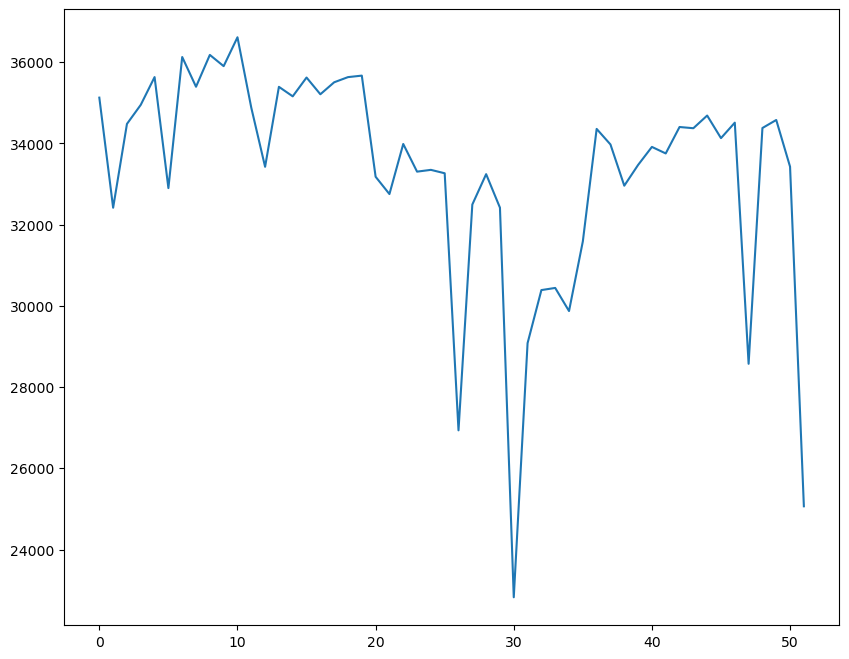

In [26]:
pd.Series(y.values).plot(figsize=(10, 8))

* The diagram is correct, but there is a problem.

* The serial number of the week is written on the horizontal axis.

* This is not very convenient, because we may not remember when in time, for example, the 13th week falls.

* To solve the problem, on the horizontal axis we will put the time at which each week of each team begins.

In [31]:
x = weekly.pickup_datetime.min()
x.iloc[:3]

week
1   2013-01-01 00:00:00
2   2013-01-07 00:00:29
3   2013-01-14 00:00:00
Name: pickup_datetime, dtype: datetime64[ns]

* We notice that the first week of the year contains six days, and not seven.

* This explains why 2013 started on a Tuesday.

In [ ]:
x.loc[1].day_name()

'Tuesday'

* Now in the diagram we can put something more understandable on the horizontal axis.

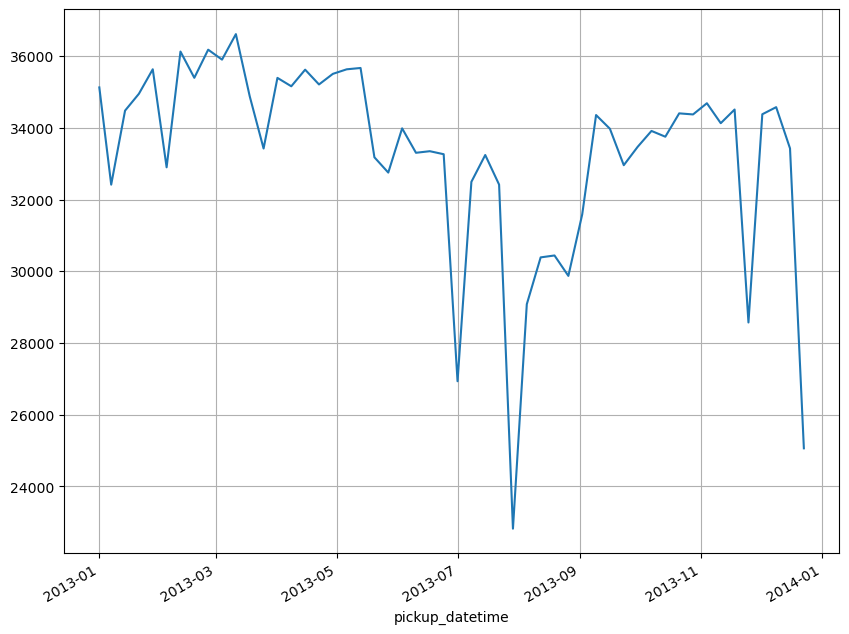

In [35]:
pd.Series(y.values, index=x).plot(figsize=(10, 8))
plt.grid()

* If we move from the month to the days of the week, how much is the taxi traffic?

* It is enough to group exactly by day within the week.

In [ ]:
dayofweek_rides = taxis.groupby(taxis.pickup_datetime.dt.dayofweek)
len(dayofweek_rides)

7

* And count how many trips were made on each day of the week.

In [ ]:
day_of_week_rides_num = dayofweek_rides.size()
day_of_week_rides_num

pickup_datetime
0    224342
1    246768
2    249750
3    255900
4    263773
5    262127
6    229137
dtype: int64

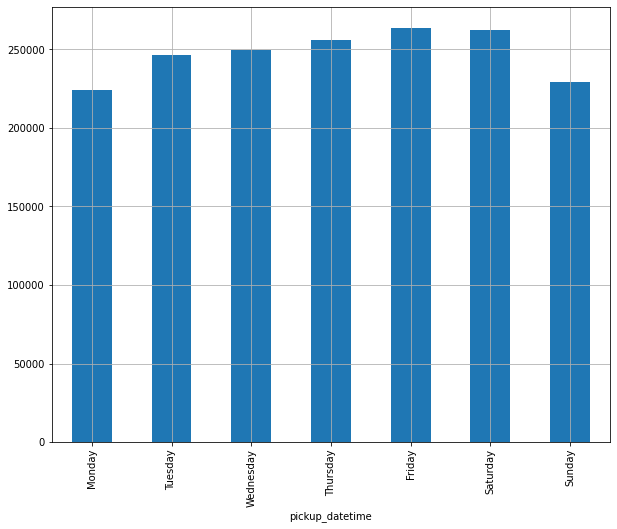

In [ ]:
day_of_week_rides_num.plot(kind='bar', figsize=(10, 8))
plt.gca().set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()

* Correspondingly, we can also see the hourly situation.

In [ ]:
hourly_rides = taxis.groupby(taxis.pickup_datetime.dt.hour)
len(hourly_rides)

24

* We do the counting:

In [ ]:
hourly_rides_num = hourly_rides.size()
hourly_rides_num

pickup_datetime
0      69279
1      50967
2      38098
3      27537
4      20058
5      17475
6      35918
7      62327
8      77968
9      80253
10     78149
11     80642
12     85324
13     84133
14     86588
15     83057
16     69029
17     83954
18    104198
19    108802
20    103391
21    100562
22     97859
23     86229
dtype: int64

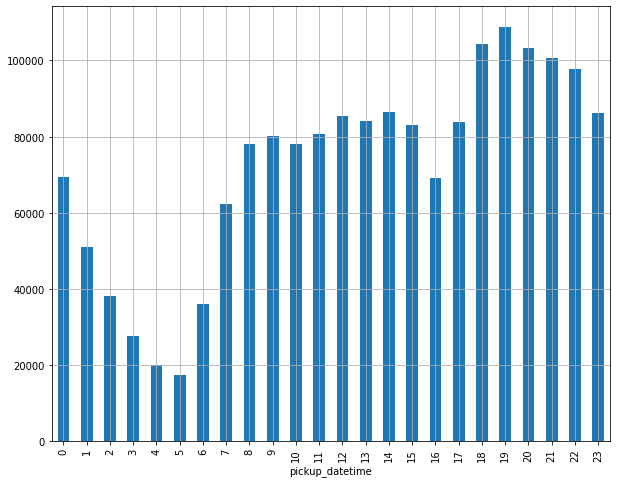

In [ ]:
hourly_rides_num.plot.bar(figsize=(10, 8))
plt.grid()